In [1]:
import json 
import pandas as pd

In [2]:
df = pd.read_csv("n50-cleaned.csv")

In [3]:
df.shape

(25, 18)

In [4]:
df['answers']

0     [2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, ...
1     [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, ...
2     [2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, ...
3     [1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, ...
4     [1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, ...
5     [1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, ...
6     [1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, ...
7     [2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, ...
8     [2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, ...
9     [1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, ...
10    [1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, ...
11    [1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, ...
12    [1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, ...
13    [2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, ...
14    [2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, ...
15    [2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, ...
16    [1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, ...
17    [2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2,

In [5]:
df['drawings']

0     [['g1_l40_a', 'g1_l65_b'], ['g3_l80_a', 'g3_l4...
1     [['g5_l65_b', 'g5_l50_c'], ['g2_l40_c', 'g2_l7...
2     [['g5_l40_a', 'g5_l80_c'], ['g2_l50_c', 'g2_l8...
3     [['g1_l50_a', 'g1_l40_c'], ['g1_l55_c', 'g1_l4...
4     [['g3_l70_b', 'g3_l45_a'], ['g4_l80_c', 'g4_l7...
5     [['g5_l65_b', 'g5_l60_a'], ['g3_l80_c', 'g3_l7...
6     [['g2_l60_c', 'g2_l65_a'], ['g5_l60_c', 'g5_l8...
7     [['g3_l40_c', 'g3_l70_b'], ['g1_l55_c', 'g1_l5...
8     [['g2_l40_a', 'g2_l75_b'], ['g5_l80_a', 'g5_l7...
9     [['g3_l65_b', 'g3_l60_c'], ['g3_l50_a', 'g3_l7...
10    [['g4_l80_a', 'g4_l40_b'], ['g2_l55_c', 'g2_l7...
11    [['g1_l60_a', 'g1_l75_b'], ['g1_l65_a', 'g1_l4...
12    [['g4_l70_b', 'g4_l70_a'], ['g3_l65_b', 'g3_l4...
13    [['g1_l45_a', 'g1_l80_c'], ['g4_l65_a', 'g4_l4...
14    [['g2_l40_b', 'g2_l70_c'], ['g1_l80_c', 'g1_l4...
15    [['g4_l75_c', 'g4_l40_a'], ['g1_l45_b', 'g1_l7...
16    [['g2_l45_b', 'g2_l80_a'], ['g4_l80_c', 'g4_l5...
17    [['g3_l75_b', 'g3_l75_a'], ['g5_l65_a', 'g

In [6]:
#Let's look at one for now. 
import re
responses = json.loads(df.iloc[0]['answers'])
drawings = json.loads(df.iloc[0]['drawings'].replace("\'", "\""))


def extract_metric(drawing_name):
    match = re.search(r'l(\d+)', drawing_name)
    return int(match.group(1)) if match else None

data = []
for row in range(df.shape[0]):
    responses = json.loads(df.iloc[row]['answers'])
    drawings = json.loads(df.iloc[row]['drawings'].replace("\'", "\""))
    for i, (pair, response) in enumerate(zip(drawings, responses)):
        metric_1 = extract_metric(pair[0])
        metric_2 = extract_metric(pair[1])
        metric_diff = metric_2 - metric_1
        
        preferred_higher_metric = 1 if (response == 2 and metric_diff > 0) or (response == 1 and metric_diff < 0) else 0
        
        data.append({'metric_diff': abs(metric_diff), 'preferred_higher_metric': preferred_higher_metric})

newdf = pd.DataFrame(data)

## Hypothesis 1: The stress of a drawing effects participant preference
Treat each response as independent trial. 
Define 0 to be a response with lower inverse stress
Define 1 to be a response with higher inverse stress
Determine if responses differ from a uniform random distribution (binomial test).
Similar analyis to <a href="https://arxiv.org/abs/2008.04869">Turing test for Graph Drawing</a> 

In [7]:
# #Accuracy column has 0 or 1 precomputed
# responses = list()
# for participant in df['accuracy'].to_list():
#     responses.extend(json.loads(participant))
# responses[:4]

In [8]:
responses = newdf['preferred_higher_metric'].to_numpy()

In [9]:
from scipy.stats import binomtest

pvalue = binomtest(
    sum(responses),
    len(responses),
    p=0.5
)

if pvalue.pvalue < 0.05: print("Responses are significantly different from a random choice")

Responses are significantly different from a random choice


In [10]:
sum(responses) / len(responses)

0.696

Let's instead treat each participant as a different sample

In [11]:
data = dict()
for row in range(df.shape[0]):
    responses_ = json.loads(df.iloc[row]['answers'])
    drawings = json.loads(df.iloc[row]['drawings'].replace("\'", "\""))
    
    local_data = list()
    for i, (pair, response) in enumerate(zip(drawings, responses_)):
        metric_1 = extract_metric(pair[0])
        metric_2 = extract_metric(pair[1])
        metric_diff = metric_2 - metric_1
        
        preferred_higher_metric = 1 if (response == 2 and metric_diff > 0) or (response == 1 and metric_diff < 0) else 0
        
        local_data.append(preferred_higher_metric)
    
    data[f'p{row}'] =  local_data


newdf = pd.DataFrame(data)

In [12]:
newdf.head()

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24
0,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,1,1,1,1,1,1
1,1,1,1,1,1,0,1,0,1,1,...,0,1,0,0,0,1,1,0,0,1
2,1,0,1,0,0,1,1,1,0,0,...,0,0,1,0,0,1,1,0,1,1
3,1,1,1,1,1,1,1,1,0,1,...,1,1,0,1,1,1,1,1,1,1
4,1,1,1,1,0,1,0,1,1,1,...,0,1,1,0,1,1,0,1,1,1


In [13]:
from scipy.stats import friedmanchisquare
result = friedmanchisquare(*[newdf[col] for col in newdf.columns])

if result.pvalue < 0.05 / ((25 * 24) / 2):
    print("Significant difference")

Significant difference


In [14]:
responses

array([1, 1, 1, ..., 0, 1, 1])

In [15]:
import numpy as np

In [16]:
stress = pd.read_csv("cleaned_data/nt_stress50-cleaned.csv")
stress_responses = stress[['accuracy']].values.tolist()
stress_responses_table = [json.loads(s[0]) for s in stress_responses]


In [17]:
stress_responses = np.array(stress_responses_table).flatten()

In [18]:
contingency_table = np.array([
    [sum(responses), sum(1 for r in responses if r == 0)],
    [sum(stress_responses), sum(1 for r in stress_responses if r == 0)]
])
contingency_table

array([[783, 342],
       [714, 411]])

In [19]:
from scipy.stats import chi2_contingency

chi2_stat, pvalue, dof, expected = chi2_contingency(contingency_table)

In [20]:
print(chi2_stat, pvalue, dof, expected)

9.229614607701459 0.00238131764885345 1 [[748.5 376.5]
 [748.5 376.5]]


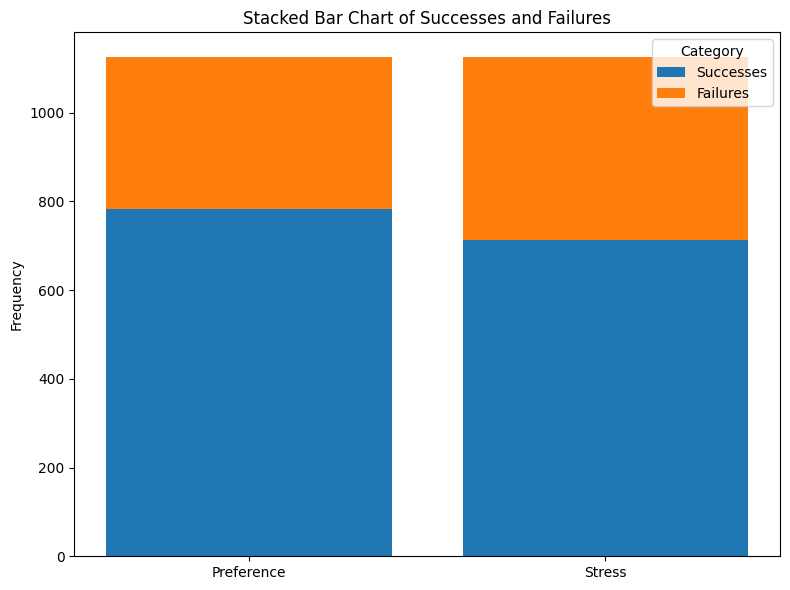

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Define labels for groups and categories
groups = ['Preference', 'Stress']
categories = ['Successes', 'Failures']

# Transpose data to stack categories for each group
stacked_data = contingency_table.T

# Create a stacked bar chart
x = np.arange(len(groups))  # Group positions on x-axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each category
for i, category_data in enumerate(stacked_data):
    ax.bar(x, category_data, label=categories[i], bottom=stacked_data[:i].sum(axis=0))

# Add labels, title, and legend
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_ylabel('Frequency')
ax.set_title('Stacked Bar Chart of Successes and Failures')
ax.legend(title='Category')

plt.tight_layout()
plt.show()


In [22]:
pref_means = np.mean(newdf.to_numpy().T,axis=1)
stress_means = np.mean(np.array(stress_responses_table), axis=1)

In [23]:
from scipy.stats import wilcoxon
wilcoxon(pref_means,stress_means)

WilcoxonResult(statistic=128.0, pvalue=0.3665854334831238)

(0.0, 1.0)

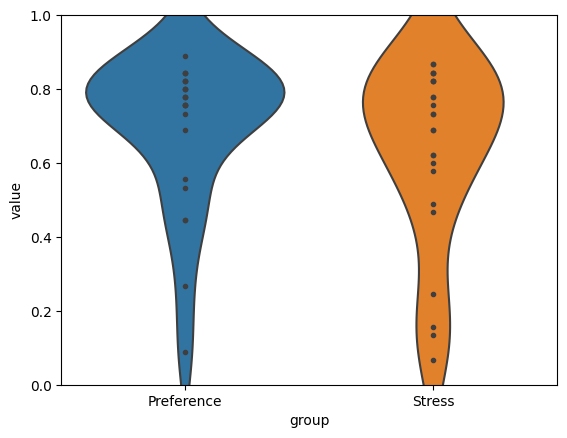

In [24]:
import seaborn as sns

data = {
    "group": ["Preference"] * len(pref_means) + ['Stress'] * len(stress_means), 
    "value": [float(x) for x in pref_means.tolist() + stress_means.tolist()]
}

data = pd.DataFrame(data)

fig = plt.figure()

ax = sns.violinplot(data=data,x='group',y='value',inner='point')
fig.add_axes(ax)
ax.set_ylim(0,1)

In [25]:
stress_exp = list()
for i,fname in enumerate(["nt_stress50-cleaned.csv", "stress50-cleaned.csv", "stress_expert-cleaned.csv", "preference50-cleaned.csv"]):
    stress = pd.read_csv(f"cleaned_data/{fname}")
    stress_responses = stress[['accuracy' if i != 2 else 'accuracy50']].values.tolist()
    stress_responses_table = [json.loads(s[0]) for s in stress_responses]
    stress_exp.append(stress_responses_table)

stress_exp = {key: s for key,s in zip(['untrained', 'trained', 'expert', 'preference'], stress_exp)}

In [26]:
means = {
    key: np.mean(np.array(tab), axis=1) for key, tab in stress_exp.items()
}
means['preference'] = np.mean(newdf.to_numpy().T,axis=1)

In [27]:
print([len(m) for m in means.values()])

[25, 25, 9, 25]


(0.0, 1.0)

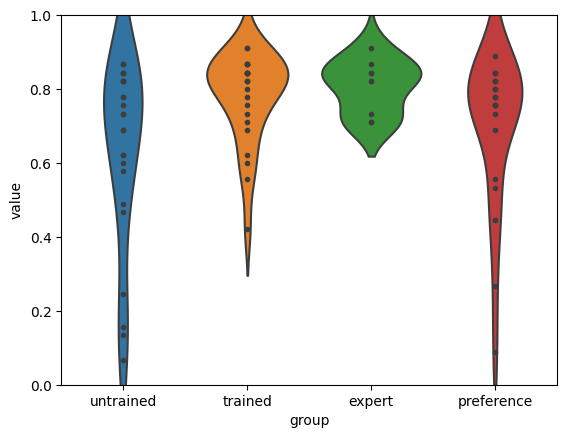

In [28]:
data = {
    "group": sum(([key] * len(val) for key,val in means.items()), start=[]), 
    "value": sum(([float(x) for x in val] for val in means.values()), start=[])
}

data = pd.DataFrame(data)

fig = plt.figure()

ax = sns.violinplot(data=data,x='group',y='value',inner='point')
fig.add_axes(ax)
ax.set_ylim(0,1)

In [29]:
from itertools import combinations
from scipy.stats import mannwhitneyu
for k1,k2 in combinations(means.keys(),2):
    print(f'{k1} vs. {k2}')
    test = mannwhitneyu(means[k1], means[k2])
    print(f'pvalue is {test.pvalue}')
    print()

untrained vs. trained
pvalue is 0.012905317872692001

untrained vs. expert
pvalue is 0.03778530075073666

untrained vs. preference
pvalue is 0.45958454889092526

trained vs. expert
pvalue is 0.8591357052512849

trained vs. preference
pvalue is 0.03691955378942671

expert vs. preference
pvalue is 0.10361046095217016



In [30]:
from scipy.stats import bootstrap

# # Example data
# data = np.array([1.2, 2.3, 3.4, 2.8, 3.1, 2.9, 3.8])

# # Perform bootstrap for the mean
# res = bootstrap((data,), np.mean, confidence_level=0.95, n_resamples=1000, method='basic')
# print(f"Mean Estimate: {res.confidence_interval.low}, {res.confidence_interval.high}")


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

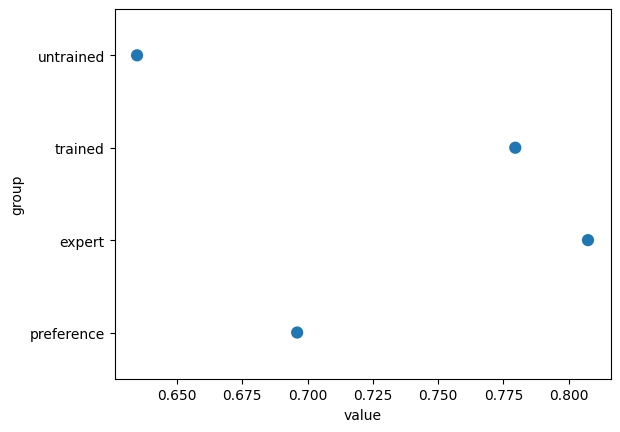

In [51]:
import seaborn as sns
import pandas as pd

# Example data

# bs = lambda x: bootstrap((x,), np.mean, )

# Interval plot using Seaborn's pointplot
sns.pointplot(data=data, y="group", x="value", errorbar= lambda x: (0,1), ci=None, capsize=0.2,join=False)

newdata = {
    'group': list(means.keys()),
    'mean' : means.values()
}

newdf = pd.DataFrame(newdata)

sns.barplot(x='mean', y='group', data=newdf, xerr=[0.2,0.5],orient='h')
# plt.title("Confidence intervals for mean \"accuracy\" ")
# plt.xlabel("accuracy")
# plt.show()

In [184]:
# correlation between pairs seen in both experiments

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from pingouin import compute_effsize

fig,ax = plt.subplots()
# for i, (n1, n2) in enumerate(combinations(means.keys(),2)):
for i, n2 in enumerate(['untrained', 'trained', 'expert']):
    # Example data
    n1 = 'preference'
    group2 = means[n1]
    group1 = means[n2]

    # Compute Cohen's d
    cohen_d = compute_effsize(group1, group2, eftype='cohen')

    # Bootstrap Confidence Interval
    n_boot = 10000
    bootstrapped_d = []
    for _ in range(n_boot):
        boot_g1 = np.random.choice(group1, size=len(group1), replace=True)
        boot_g2 = np.random.choice(group2, size=len(group2), replace=True)
        boot_d = compute_effsize(boot_g1, boot_g2, eftype='cohen')
        bootstrapped_d.append(boot_d)

    # Calculate 95% Confidence Interval
    ci_lower = np.percentile(bootstrapped_d, 2.5)
    ci_upper = np.percentile(bootstrapped_d, 97.5)

    print(f"Cohen's d: {cohen_d:.2f}, 95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

    
    # Plot Effect Size with Confidence Interval
    # plt.figure(figsize=(6, 4))
    ax.errorbar(
        x=cohen_d, y=i, xerr=[[cohen_d - ci_lower], [ci_upper - cohen_d]],
        fmt='o', capsize=5, label=f'{n1} v {n2}'
    )
    ax.axvline(0, color='gray', linestyle='--', linewidth=0.7)
    ax.set_title(f"{n1} vs. {n2}")
    # plt.ylabel("Cohen's d")
    ax.set_yticks([])
    plt.legend()
plt.savefig(f'figures/{n1}{n2}.png')
plt.clf()

Cohen's d: 0.75, 95% CI: [0.28, 1.24]
Cohen's d: 0.80, 95% CI: [0.44, 1.21]
Cohen's d: 0.28, 95% CI: [-0.28, 0.85]
Cohen's d: 0.25, 95% CI: [-0.41, 0.79]
Cohen's d: -0.51, 95% CI: [-1.00, 0.03]
Cohen's d: -0.63, 95% CI: [-1.03, -0.21]


<Figure size 640x480 with 0 Axes>

In [199]:
import statsmodels.stats.api as sms

# Mean difference and confidence intervals
cm = sms.CompareMeans(sms.DescrStatsW(group1), sms.DescrStatsW(group2))
ci = cm.tconfint_diff(usevar='pooled')  # CI for pooled variance
print(f"95% CI for Mean Difference: {ci}")


95% CI for Mean Difference: (-8.022095722320056, 1.7846559932496264)


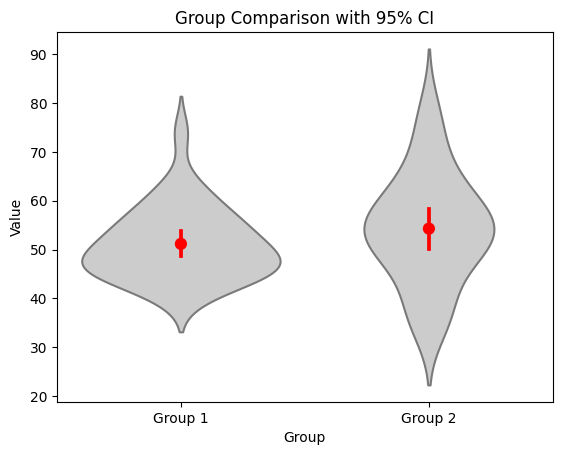

In [200]:
import pandas as pd
import seaborn as sns

# Combine data into a DataFrame
df = pd.DataFrame({
    'Value': np.concatenate([group1, group2]),
    'Group': ['Group 1'] * len(group1) + ['Group 2'] * len(group2)
})

# Violin plot with confidence intervals
sns.violinplot(data=df, x='Group', y='Value', inner=None, color=".8")
sns.pointplot(data=df, x='Group', y='Value', ci=95, join=False, color='red')
plt.title("Group Comparison with 95% CI")
plt.show()
